<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_cluster_groupwise_0_1_0_9_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.1_0.9'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.1_0.9_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,91.706571,85.965224,25.665839,-0.107134,213.230501,212.649160,0.581341
1,0.0,1.0,53.455916,39.322374,21.738502,0.283456,124.800249,124.256436,0.543813
2,0.0,2.0,36.899278,37.425266,39.543880,-0.361849,123.506576,123.887014,-0.380439
3,0.0,3.0,30.916764,51.589234,37.796019,0.282162,130.584180,130.333117,0.251063
4,0.0,4.0,98.227226,89.318405,98.166491,-0.768275,294.943847,295.452080,-0.508233
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,88.391965,21.220341,78.269309,1.192526,199.074141,197.882381,1.191760
29996,999.0,26.0,54.915495,26.635359,30.900003,-0.445229,122.005628,122.478425,-0.472797
29997,999.0,27.0,56.549013,97.453508,40.092721,1.524925,205.620167,204.364690,1.255477
29998,999.0,28.0,88.615938,89.442979,44.271313,0.255779,232.586010,232.456493,0.129517


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    91.706571  85.965224  25.665839  ...  213.230501  212.649160  0.581341
      1.0    53.455916  39.322374  21.738502  ...  124.800249  124.256436  0.543813
      2.0    36.899278  37.425266  39.543880  ...  123.506576  123.887014 -0.380439
      3.0    30.916764  51.589234  37.796019  ...  130.584180  130.333117  0.251063
      4.0    98.227226  89.318405  98.166491  ...  294.943847  295.452080 -0.508233
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   88.391965  21.220341  78.269309  ...  199.074141  197.882381  1.191760
      26.0   54.915495  26.635359  30.900003  ...  122.005628  122.478425 -0.472797
      27.0   56.549013  97.453508  40.092721  ...  205.620167  204.364690  1.255477
      28.0   88.615938  89.442979  44.271313  ...  232.586010  232.456493  0.129517
      29.0   48.762036  33.139257  45.609427  ...  138.194121  137.622370  0.571751

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    91.706571  85.965224  25.665839  ...  213.230501  212.649160  0.581341
      1.0    53.455916  39.322374  21.738502  ...  124.800249  124.256436  0.543813
      2.0    36.899278  37.425266  39.543880  ...  123.506576  123.887014 -0.380439
      3.0    30.916764  51.589234  37.796019  ...  130.584180  130.333117  0.251063
      4.0    98.227226  89.318405  98.166491  ...  294.943847  295.452080 -0.508233
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   88.391965  21.220341  78.269309  ...  199.074141  197.882381  1.191760
      26.0   54.915495  26.635359  30.900003  ...  122.005628  122.478425 -0.472797
      27.0   56.549013  97.453508  40.092721  ...  205.620167  204.364690  1.255477
      28.0   88.615938  89.442979  44.271313  ...  232.586010  232.456493  0.129517
      29.0   48.762036  33.139257  45.609427  ...  138.194121  137.622370  0.571751

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,91.706571,85.965224,25.665839,-0.107134,213.230501,212.649160,0.581341
1,0.0,1.0,53.455916,39.322374,21.738502,0.283456,124.800249,124.256436,0.543813
2,0.0,2.0,36.899278,37.425266,39.543880,-0.361849,123.506576,123.887014,-0.380439
3,0.0,3.0,30.916764,51.589234,37.796019,0.282162,130.584180,130.333117,0.251063
4,0.0,4.0,98.227226,89.318405,98.166491,-0.768275,294.943847,295.452080,-0.508233
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,88.391965,21.220341,78.269309,1.192526,199.074141,197.882381,1.191760
29996,999.0,26.0,54.915495,26.635359,30.900003,-0.445229,122.005628,122.478425,-0.472797
29997,999.0,27.0,56.549013,97.453508,40.092721,1.524925,205.620167,204.364690,1.255477
29998,999.0,28.0,88.615938,89.442979,44.271313,0.255779,232.586010,232.456493,0.129517


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    91.706571  85.965224  25.665839  ...  213.230501  212.649160  0.581341
      1.0    53.455916  39.322374  21.738502  ...  124.800249  124.256436  0.543813
      2.0    36.899278  37.425266  39.543880  ...  123.506576  123.887014 -0.380439
      3.0    30.916764  51.589234  37.796019  ...  130.584180  130.333117  0.251063
      4.0    98.227226  89.318405  98.166491  ...  294.943847  295.452080 -0.508233
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   88.391965  21.220341  78.269309  ...  199.074141  197.882381  1.191760
      26.0   54.915495  26.635359  30.900003  ...  122.005628  122.478425 -0.472797
      27.0   56.549013  97.453508  40.092721  ...  205.620167  204.364690  1.255477
      28.0   88.615938  89.442979  44.271313  ...  232.586010  232.456493  0.129517
      29.0   48.762036  33.139257  45.609427  ...  138.194121  137.622370  0.571751

[30000 rows x 7 columns]

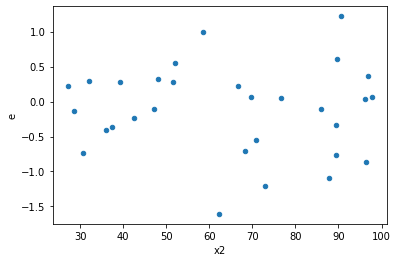

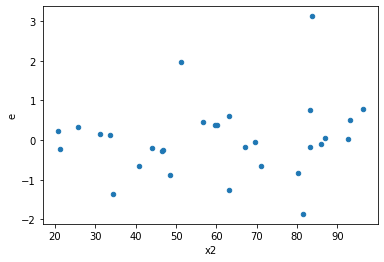

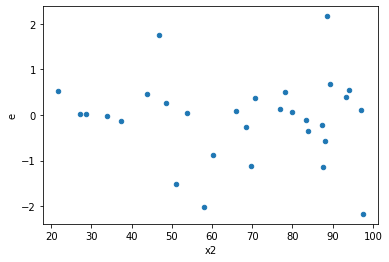

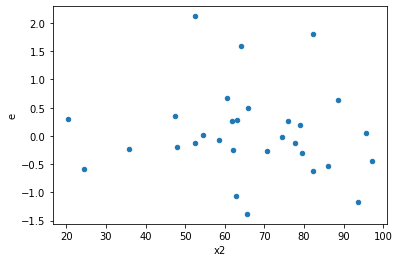

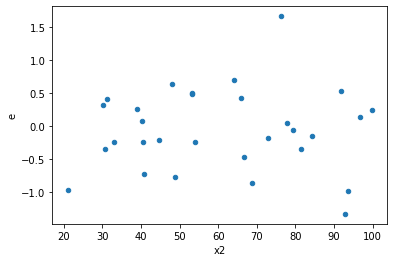

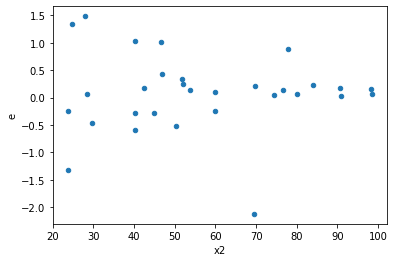

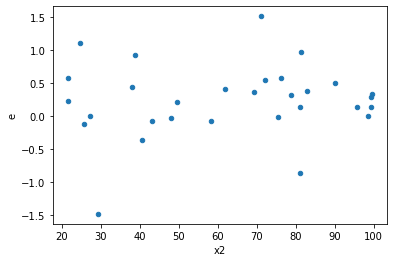

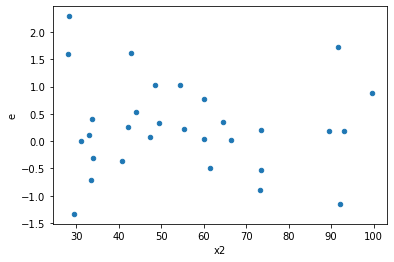

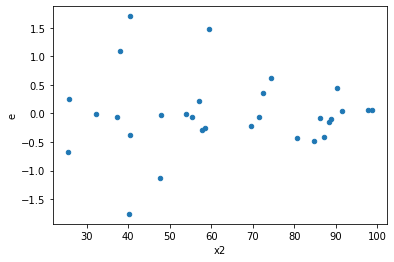

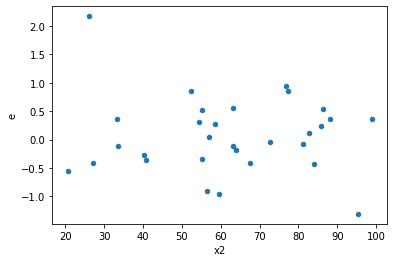

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
1.0,8.0,16.0,5.201415315553164,12.080680510614329,0.7430593307933091,0.805378700707622,1.1612878204986756,0.8665771780669855,0.5667114109665072,Reject001=1 : Homoscedasticity
4.0,12.0,12.0,2.997842992204311,6.666410310610782,0.2725311811094828,0.6060373009646166,2.2237356419086436,0.18067357801913553,0.9096632109904322,Reject001=1 : Homoscedasticity
5.0,10.0,14.0,0.8192980889609031,12.27825349141471,0.0910331209956559,0.9444810378011315,10.704505702459578,0.0006426883526911009,0.9996786558236544,Reject001=0 : Heteroscedasticity
6.0,15.0,9.0,3.7660038688852397,4.150377838507934,0.2690002763489457,0.5187972298134917,1.8367735770703777,0.2862299006145239,0.856885049692738,Reject001=1 : Homoscedasticity
8.0,13.0,11.0,1.734890358954308,9.19407220333616,0.14457419657952567,0.9194072203336161,6.263059586890009,0.002679500694342085,0.998660249652829,Reject001=0 : Heteroscedasticity
13.0,12.0,12.0,4.954201619576744,5.526155212672264,0.4503819654160676,0.5023777466065694,1.1154481866130397,0.8529975475279961,0.573501226236002,Reject001=1 : Homoscedasticity
14.0,13.0,11.0,5.390076290750557,9.55724453405853,0.44917302422921307,0.955724453405853,2.095503801646565,0.20562506658509494,0.8971874667074525,Reject001=1 : Homoscedasticity
15.0,10.0,14.0,3.128650234352964,7.63180173154684,0.347627803816996,0.5870616716574493,1.7423765978213495,0.38081975318772576,0.8095901234061371,Reject001=1 : Homoscedasticity
18.0,13.0,11.0,3.145493874841552,3.5547755659838796,0.26212448957012935,0.355477556598388,1.3355926170335932,0.612475099426923,0.6937624502865385,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,14.0,10.0,6.804669830538037,0.9441423007689438,0.5234361408106183,0.1049047000854382,0.19424883998699585,0.013126004257834506,Reject001=1 : Homoscedasticity
1.0,8.0,16.0,5.201415315553164,12.080680510614329,0.7430593307933091,0.805378700707622,1.1612878204986756,1.1334228219330145,Reject001=1 : Homoscedasticity
2.0,14.0,10.0,13.906982485295377,6.309080523488889,1.0697678834842597,0.701008947054321,0.6351279109054578,0.4752892293586373,Reject001=1 : Homoscedasticity
3.0,12.0,12.0,8.795802349833583,5.359468702603633,0.7996183954394166,0.48722442750942113,0.6093211840651507,0.40301081381669285,Reject001=1 : Homoscedasticity
4.0,12.0,12.0,2.997842992204311,6.666410310610782,0.2725311811094828,0.6060373009646166,2.2237356419086436,0.18067357801913553,Reject001=1 : Homoscedasticity
5.0,10.0,14.0,0.8192980889609031,12.27825349141471,0.0910331209956559,0.9444810378011315,10.704505702459578,0.0006426883526911009,Reject001=0 : Heteroscedasticity
6.0,15.0,9.0,3.7660038688852397,4.150377838507934,0.2690002763489457,0.5187972298134917,1.8367735770703777,0.2862299006145239,Reject001=1 : Homoscedasticity
7.0,11.0,13.0,11.410494498873847,3.4945501005569173,1.1410494498873847,0.2912125083797431,0.2591410046650807,0.02381363482505516,Reject001=1 : Homoscedasticity
8.0,13.0,11.0,1.734890358954308,9.19407220333616,0.14457419657952567,0.9194072203336161,6.263059586890009,0.002679500694342085,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      939
Reject001=0 : Heteroscedasticity     61
Name: Result_test, dtype: int64